<a href="https://colab.research.google.com/github/ArkanUbaidillah/Arkan-Ubaidillah-Warman_2411537001_ML2526/blob/main/Praktikum1/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseValue'] = pd.Series(housing.target)

targets=df['MedHouseValue']
inputs=df.drop('MedHouseValue', axis=1)
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [5]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=1)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_test)

(14448, 8) (6192, 8)
(14448,) (6192,)
[[1.89659453e-01 7.45098039e-01 2.59249620e-02 ... 8.26699958e-04
  1.61530287e-01 5.94594595e-01]
 [1.01964111e-01 7.05882353e-01 2.93658328e-02 ... 1.49655077e-03
  4.50584485e-01 4.52452452e-01]
 [2.42293210e-01 8.82352941e-01 2.57625553e-02 ... 2.43712035e-03
  5.51540914e-01 1.88188188e-01]
 ...
 [1.43901463e-01 9.01960784e-01 2.71911561e-02 ... 1.63065424e-03
  5.92986185e-01 2.05205205e-01]
 [1.45508338e-01 2.35294118e-01 2.97484189e-02 ... 1.59782455e-03
  5.87672689e-01 2.06206206e-01]
 [8.33367816e-02 5.49019608e-01 1.45501245e-02 ... 1.74904890e-03
  1.65781084e-01 6.00600601e-01]]


In [8]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

print(f'intercept: {lr_model.intercept_}')
print(f'slope: {lr_model.coef_}')

intercept: 3.721516132506502
slope: [  6.39513914   0.49408893 -14.78075919  20.98391128  -0.2003207
  -4.08551937  -3.98214561  -4.37460957]


mse: 0.5296293151408232
r2: 0.597142973735963


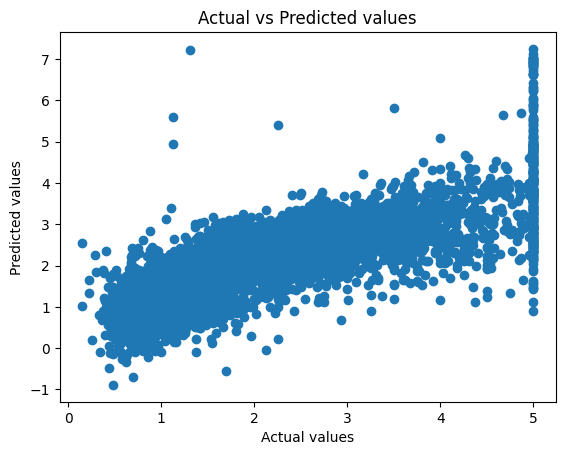

In [11]:
import matplotlib.pyplot as plt
y_pred=lr_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=lr_model.score(X_test,y_test)
print(f'mse: {mse}')
print(f'r2: {r2}')

plt.scatter(y_test,y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()

In [13]:
import pickle

file_name = 'finalized_model.sav'
pickle.dump(lr_model, open(file_name, 'wb'))